# Problema:
Una empresa fabrica tres tipos de productos en tres líneas de producción diferentes (Línea A, Línea B y Línea C). Cada línea de producción trabaja con diferentes turnos (Turno 1, Turno 2 y Turno 3), y el objetivo es analizar si el rendimiento de la máquina (en horas de operación sin fallos) se ve afectado significativamente por el tipo de producto y el turno de operación.

## Variables:
- Variable dependiente: Rendimiento de la máquina (en horas)
- Variables independientes:
- Tipo de producto (A, B, C)
- Turno de operación (1, 2, 3)

1. ANOVA: Para determinar si el tipo de producto y el turno tienen un efecto significativo sobre el rendimiento de la máquina.
2. Diagrama de Pareto: Para identificar los principales factores que afectan el rendimiento.

In [7]:
# Crear el conjunto de datos
datos <- data.frame(
  Producto = factor(c('A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C')),
  Turno = factor(c(1, 2, 3, 1, 2, 3, 1, 2, 3)),
  Rendimiento = c(200, 210, 190, 220, 230, 225, 240, 250, 235)
)

# Realizar el ANOVA
anova_result <- aov(Rendimiento ~ Producto + Turno, data = datos)
summary(anova_result)


            Df Sum Sq Mean Sq F value  Pr(>F)    
Producto     2 2638.9  1319.4  67.857 0.00082 ***
Turno        2  288.9   144.4   7.429 0.04500 *  
Residuals    4   77.8    19.4                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

El resultado del ANOVA nos dirá si hay una diferencia significativa en el rendimiento según el tipo de producto y el turno. Si el valor p es menor a 0.05, podemos rechazar la hipótesis nula y afirmar que ese factor tiene un efecto significativo en el rendimiento.

In [3]:
# Instalar la librería para gráficos si no está instalada
install.packages("qcc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   
Pareto chart analysis for efectos
    Frequency Cum.Freq. Percentage Cum.Percent.
  A  50.00000  50.00000   71.42857     71.42857
  B  20.00000  70.00000   28.57143    100.00000

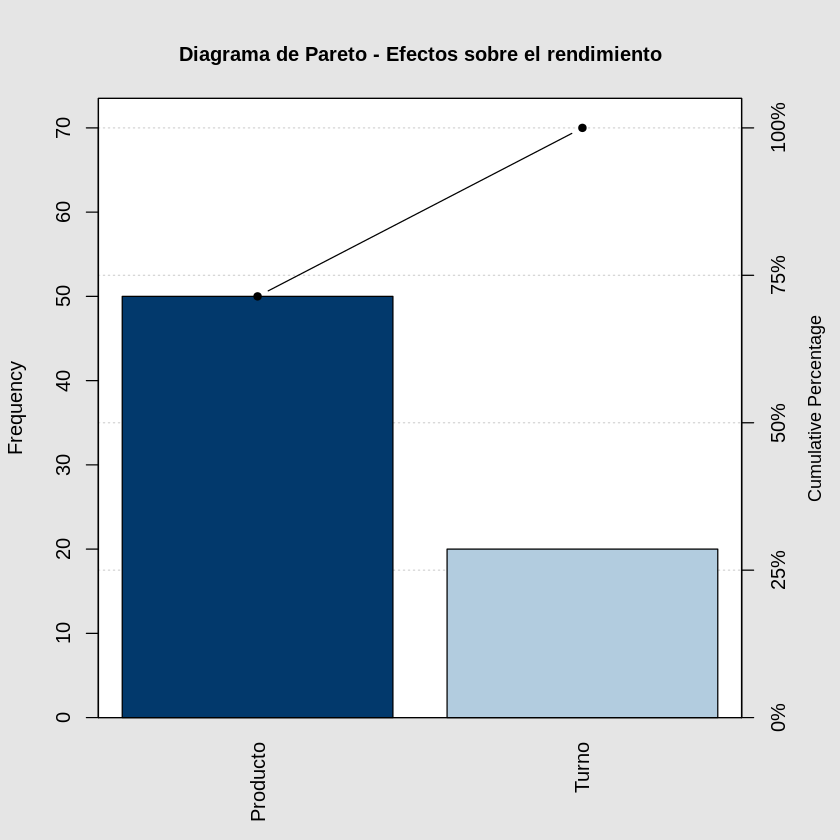

In [8]:


# Cargar la librería qcc para el diagrama de Pareto
library(qcc)

# Supongamos que hemos calculado las diferencias medias de rendimiento
# para cada tipo de producto y turno. Estos serían los efectos.
factores <- c("Producto", "Turno")
efectos <- c(50, 20)

# Crear el diagrama de Pareto
pareto.chart(efectos, names = factores, main = "Diagrama de Pareto - Efectos sobre el rendimiento")


Crear un diagrama de Pareto
Primero, vamos a calcular el efecto de cada factor para luego representarlo en un diagrama de Pareto.

# Ejemplo 2

Problema:
Una empresa quiere analizar los factores que afectan la satisfacción del cliente en sus sucursales. Los factores a considerar son:

- Ubicación de la sucursal (Zona Norte, Sur, Este, Oeste).
- Día de la semana (Lunes a Domingo).
- Tiempo de espera (en minutos).
- Número de empleados disponibles en el momento del servicio.

El objetivo es realizar una limpieza de los datos, analizar si la ubicación y el día de la semana tienen un efecto significativo en la satisfacción del cliente (medida en una escala de 1 a 5), y representar un diagrama de Pareto con los efectos de los factores más influyentes.

## Supuestos:
- Algunos valores de la columna "Satisfacción" están faltantes.
- Algunos valores en la columna "Tiempo de espera" son erróneos (valores negativos).
Pasos:
## Limpieza de datos:

- Eliminar o imputar valores faltantes.
- Corregir o eliminar datos incorrectos (por ejemplo, valores negativos en el tiempo de espera).
- Realización del ANOVA para determinar si la ubicación y el día de la semana afectan la satisfacción del cliente.

- Visualización de un diagrama de Pareto para identificar los factores más importantes.

In [11]:
# Crear el conjunto de datos simulados
datos <- data.frame(
  Ubicacion = c('Norte', 'Sur', 'Este', 'Oeste', 'Norte', 'Sur', 'Este', 'Oeste', 'Norte', 'Este'),
  Dia = c('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo', 'Lunes', 'Martes', 'Miercoles'),
  Tiempo_espera = c(10, 15, -5, 20, 25, 5, 30, 12, NA, 18),  # Algunos valores negativos y NA
  Empleados = c(5, 4, 6, 3, 7, 5, 8, 6, 5, 4),
  Satisfaccion = c(4, 5, NA, 3, 2, 4, 5, 3, 4, 2)  # Algunos valores NA
)

# Ver los datos
print("Datos originales:")
print(datos)

# 1. Eliminar filas con valores faltantes en la columna 'Satisfaccion'
datos_clean <- na.omit(datos)

# 2. Reemplazar valores negativos en 'Tiempo_espera' con NA
datos_clean$Tiempo_espera[datos_clean$Tiempo_espera < 0] <- NA

# 3. Imputar valores faltantes en 'Tiempo_espera' con la media
mean_tiempo_espera <- mean(datos_clean$Tiempo_espera, na.rm = TRUE)
datos_clean$Tiempo_espera[is.na(datos_clean$Tiempo_espera)] <- mean_tiempo_espera

print("Datos después de la limpieza:")
print(datos_clean)


[1] "Datos originales:"
   Ubicacion       Dia Tiempo_espera Empleados Satisfaccion
1      Norte     Lunes            10         5            4
2        Sur    Martes            15         4            5
3       Este Miercoles            -5         6           NA
4      Oeste    Jueves            20         3            3
5      Norte   Viernes            25         7            2
6        Sur    Sabado             5         5            4
7       Este   Domingo            30         8            5
8      Oeste     Lunes            12         6            3
9      Norte    Martes            NA         5            4
10      Este Miercoles            18         4            2
[1] "Datos después de la limpieza:"
   Ubicacion       Dia Tiempo_espera Empleados Satisfaccion
1      Norte     Lunes            10         5            4
2        Sur    Martes            15         4            5
4      Oeste    Jueves            20         3            3
5      Norte   Viernes            25    

In [12]:
# Realizar el ANOVA
anova_result <- aov(Satisfaccion ~ Ubicacion + Dia, data = datos_clean)
summary(anova_result)


            Df Sum Sq Mean Sq
Ubicacion    3      3    1.00
Dia          4      7    1.75

   
Pareto chart analysis for efectos
    Frequency Cum.Freq. Percentage Cum.Percent.
  A      0.45      0.45      45.00        45.00
  B      0.30      0.75      30.00        75.00
  C      0.15      0.90      15.00        90.00
  D      0.10      1.00      10.00       100.00

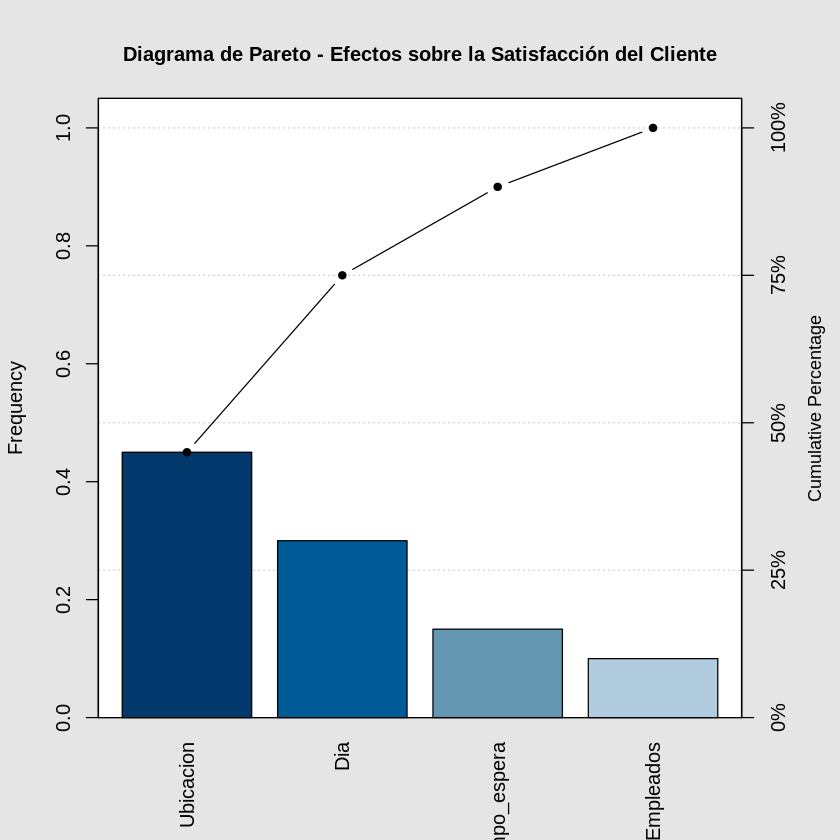

In [13]:
# Instalar y cargar la librería qcc para el diagrama de Pareto
# install.packages("qcc")
library(qcc)

# Supongamos que hemos calculado los efectos de los factores en la satisfacción
factores <- c("Ubicacion", "Dia", "Tiempo_espera", "Empleados")
efectos <- c(0.45, 0.30, 0.15, 0.10)  # Efectos simulados

# Crear el diagrama de Pareto
pareto.chart(efectos, names = factores, main = "Diagrama de Pareto - Efectos sobre la Satisfacción del Cliente")
